## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 



#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

In [3]:
#I TABLICOWANIE
import numpy as np
from tabulate import tabulate

#Stablicowanie w 4 punktach węzłowych
def lookupTab(fx, steps, x_start = 0, x_end = 10):
    array_x = np.linspace(x_start, x_end, steps)
    array_y = np.zeros([steps+1])
    for i in range(len(array_x)):
        array_y[i]=fx(array_x[i])
    return list(zip(array_x, array_y))

#Stablicowanie w punktach znajdujących się pomiędzy punktami węzłowymi
def lookupTab2(fx, steps, x_start =0, x_end =10):
    arr1_x=np.linspace(0, 10, steps)
    arr2_x=np.zeros([len(arr1_x)-1])
    array_y = np.zeros([len(arr2_x)])
    for i in range(len(arr2_x)):
        arr2_x[i]=(arr1_x[i+1]-arr1_x[i])/2+arr1_x[i]
    for i in range(len(arr2_x)):
        array_y[i]=fx(arr2_x[i])
    return list(zip(arr2_x, array_y))

def printLookupTab(fx, steps, function_name):
    domain, values = list(zip(*lookupTab(fx,steps)))
    print(tabulate({"x": domain, function_name: values}, headers="keys", floatfmt=".10f"))

def printLookupTab2(fx, steps, function_name):
    domain, values = list(zip(*lookupTab2(fx,steps)))
    print(tabulate({"x": domain, function_name: values}, headers="keys", floatfmt=".10f"))

In [4]:
#II Interpolacja wielomianowa Newtona z użyciem metody ilorazów różnicowych

import sympy
def poly_newton_coeff(zipList):
    x, y = list(zip(*zipList))
    length=len(x)
    result = []
    for i in range(length):
        result.append(y[i])
        
    for i in range(1, length):
        for j in range(length-1, i-1, -1):
            result[j] = float(result[j] - result[j - 1]) / float(x[j] - x[j - i])
    return result

#Wielomian interpolacyjny Newtona dla danych punkótw węzłowych
def newton_polynomial(zippList):
    quotients = poly_newton_coeff(zippList)
    domain = list(zip(*zippList))[0]
    X = sympy.symbols('x')
    polynomial = 0  
    for i in range(len(domain)):
        value = quotients[i]
        for j in range(i):
            value *= (X - domain[j])
        polynomial += value   
    return sympy.simplify(polynomial)

In [5]:
#III Compare interpolation results with actual values
def calculate_values(polynomial, zipList):
    domain= list(zip(*zipList))[0]
    X = sympy.symbols('x')
    values = []
    for number in domain:
        values.append(polynomial.evalf(subs={X: number}))
    return values

def compare_results(original_zipList, values_interpolated, function_name):
    relative_error = []
    absolute_error = []
    domain, values_original = list(zip(*original_zipList))
    for i in range(len(domain)):
        absolute_error.append(abs(values_original[i] - values_interpolated[i]))
        relative_error.append(absolute_error[i] / values_original[i])
    print(tabulate({"x": domain, function_name: values_original, function_name + " interpolation": values_interpolated, 
                  "relative error": relative_error, "absolute error": absolute_error}, headers="keys", floatfmt=".10f"), "\n\n")

In [6]:
# IV Wizualizacja 
import matplotlib.pyplot as plt
import math
def show_charts_main_nodes(function, polynomial, function_name):
    original_zipList = lookupTab(function, 1000, 0, 10)
    values_in = calculate_values(polynomial, original_zipList)
    domain, values = list(zip(*original_zipList))
    plt.plot(domain, values_in, label=function_name + " interpolation")
    plt.plot(domain, values, label=function_name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(function_name)
    plt.legend()
    plt.show()

sqrt(x)
Number of nodes: 3
Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 5.0000000000  2.2360679775
10.0000000000  3.1622776602

Wielomian interpolacyjny Newtona: x*(0.578199424983078 - 0.026197165896624*x) 

           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
2.5000000000  1.5811388301             1.2817662756      0.1893398282      0.2993725545
7.5000000000  2.7386127875             2.8629051057      0.0453851376      0.1242923182 




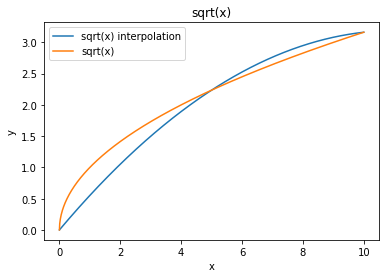

Number of nodes: 4
Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602

Wielomian interpolacyjny Newtona: x*(0.00402091444262343*x**2 - 0.0883364112915616*x + 0.797500434670111) 

           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.6666666667  1.2909944487             1.1024038155      0.1460816764      0.1885906332
5.0000000000  2.2360679775             2.2817061964      0.0204100320      0.0456382189
8.3333333333  2.8867513459             2.8382820294      0.0167902638      0.0484693165 




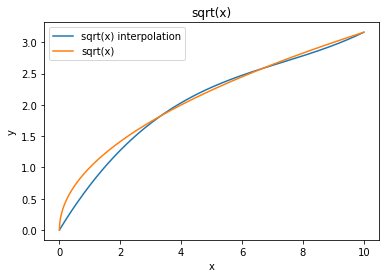

Number of nodes: 5
Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.5000000000  1.5811388301
 5.0000000000  2.2360679775
 7.5000000000  2.7386127875
10.0000000000  3.1622776602

Wielomian interpolacyjny Newtona: x*(-0.00074700900829116*x**3 + 0.0194592721406771*x**2 - 0.187359671555827*x + 0.990906275798561) 

           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.2500000000  1.1180339887             0.9820659964      0.1216134695      0.1359679924
3.7500000000  1.9364916731             1.9596017579      0.0119339965      0.0231100848
6.2500000000  2.5000000000             2.4853806275      0.0058477490      0.0146193725
8.7500000000  2.9580398915             2.9830674779      0.0084608685      0.0250275864 




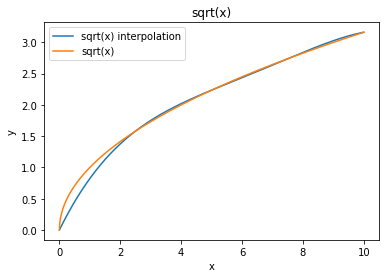

Number of nodes: 8
Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.4285714286  1.1952286093
 2.8571428571  1.6903085095
 4.2857142857  2.0701966780
 5.7142857143  2.3904572187
 7.1428571429  2.6726124191
 8.5714285714  2.9277002188
10.0000000000  3.1622776602

Wielomian interpolacyjny Newtona: x*(7.42233773029374e-6*x**6 - 0.00029976185987522*x**5 + 0.00499658093915404*x**4 - 0.0444853479059*x**3 + 0.229165167590857*x**2 - 0.700756370176983*x + 1.4806614802889) 

           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
0.7142857143  0.8451542547             0.7729116136      0.0854786458      0.0722426412
2.1428571429  1.4638501094             1.4702934747      0.0044016565      0.0064433653
3.5714285714  1.8898223650             1.8879887164      0.0009702757      0.001833648

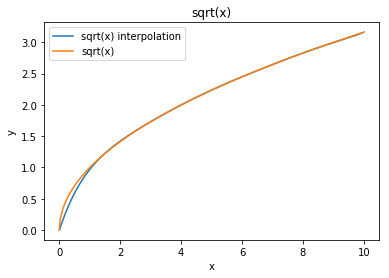



sin(x)
Number of nodes: 3
Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 5.0000000000  -0.9589242747
10.0000000000  -0.5440211109

Wielomian interpolacyjny Newtona: x*(0.0274765487687381*x - 0.329167598776318) 

           x        sin(x)    sin(x) interpolation    relative error    absolute error
------------  ------------  ----------------------  ----------------  ----------------
2.5000000000  0.5984721441           -0.6511905671      2.0880883489      1.2496627112
7.5000000000  0.9379999768           -0.9232011226      1.9842229696      1.8612010994 




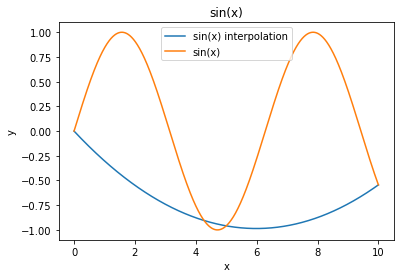

Number of nodes: 4
Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109

Wielomian interpolacyjny Newtona: x*(-0.0100718041105327*x**2 + 0.134705963139825*x - 0.394281331433923) 

           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.6666666667   0.9954079578           -0.3295810442      1.3311014761      1.3249890019
5.0000000000  -0.9589242747            0.1372669075     -1.1431467647      1.0961911822
8.3333333333   0.8872941081            0.2403126699      0.7291623288      0.6469814382 




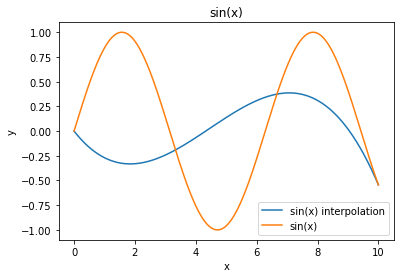

Number of nodes: 5
Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.5000000000   0.5984721441
 5.0000000000  -0.9589242747
 7.5000000000   0.9379999768
10.0000000000  -0.5440211109

Wielomian interpolacyjny Newtona: x*(-0.0132730189252085*x**3 + 0.258937302364272*x**2 - 1.53380467478385*x + 2.66293332553089) 

           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.2500000000   0.9489846194            1.4054289399      0.4809817896      0.4564443205
3.7500000000  -0.5715613187           -0.5530228042     -0.0324348655      0.0185385145
6.2500000000  -0.0331792165           -0.3068165894     -8.2472523859      0.2736373728
8.7500000000   0.6247239538            1.5325091963      1.4530981838      0.9077852426 




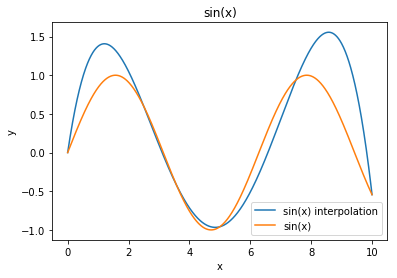

Number of nodes: 8
Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.4285714286   0.9899030764
 2.8571428571   0.2806293995
 4.2857142857  -0.9103469443
 5.7142857143  -0.5387052884
 7.1428571429   0.7576284154
 8.5714285714   0.7534867274
10.0000000000  -0.5440211109

Wielomian interpolacyjny Newtona: x*(-3.07126847293397e-5*x**6 + 0.00167369660358144*x**5 - 0.032004651889518*x**4 + 0.274799719893534*x**3 - 1.05359642423719*x**2 + 1.3684416915428*x + 0.210646770043321) 

           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
0.7142857143   0.6550778972            0.5304840293      0.1901970261      0.1245938679
2.1428571429   0.8407871058            0.8718058291      0.0368924822      0.0310187233
3.5714285714  -0.4167216518           -0.4312287301     -0.0348123939      0

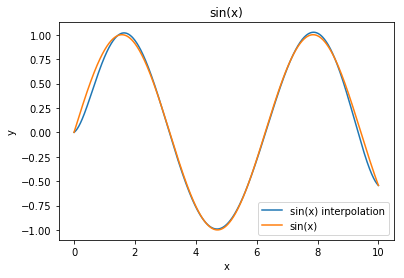



x^3+2x
Number of nodes: 3
Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 5.0000000000   135.0000000000
10.0000000000  1020.0000000000

Wielomian interpolacyjny Newtona: x*(15.0*x - 48.0) 

           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
2.5000000000   20.6250000000          -26.2500000000      2.2727272727     46.8750000000
7.5000000000  436.8750000000          483.7500000000      0.1072961373     46.8750000000 




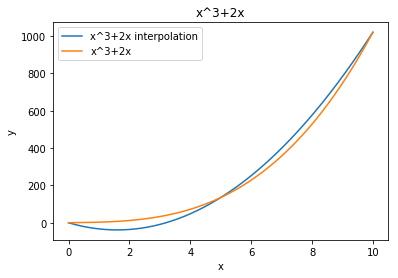

Number of nodes: 4
Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000

Wielomian interpolacyjny Newtona: x*(1.0*x**2 + 2.0) 

           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.6666666667    7.9629629630            7.9629629630      0.0000000000      0.0000000000
5.0000000000  135.0000000000          135.0000000000      0.0000000000      0.0000000000
8.3333333333  595.3703703704          595.3703703704      0.0000000000      0.0000000000 




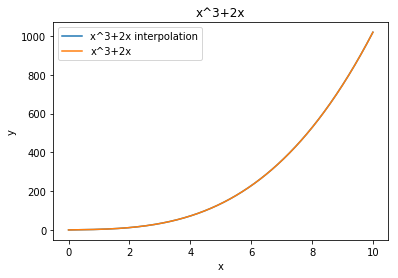

Number of nodes: 5
Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 2.5000000000    20.6250000000
 5.0000000000   135.0000000000
 7.5000000000   436.8750000000
10.0000000000  1020.0000000000

Wielomian interpolacyjny Newtona: x*(1.0*x**2 + 2.0) 

           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.2500000000    4.4531250000            4.4531250000      0.0000000000      0.0000000000
3.7500000000   60.2343750000           60.2343750000      0.0000000000      0.0000000000
6.2500000000  256.6406250000          256.6406250000      0.0000000000      0.0000000000
8.7500000000  687.4218750000          687.4218750000      0.0000000000      0.0000000000 




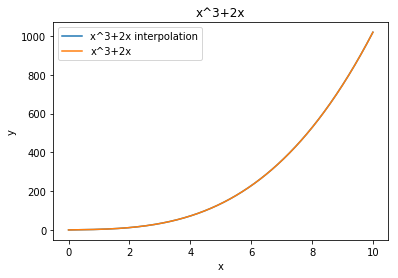

Number of nodes: 8
Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 1.4285714286     5.7725947522
 2.8571428571    29.0379008746
 4.2857142857    87.2886297376
 5.7142857143   198.0174927114
 7.1428571429   378.7172011662
 8.5714285714   646.8804664723
10.0000000000  1020.0000000000

Wielomian interpolacyjny Newtona: x*(2.79258098127381e-18*x**6 - 1.01231060571176e-16*x**5 + 1.43663784572349e-15*x**4 - 1.01386491794623e-14*x**3 + 1.00000000000004*x**2 - 6.4881962236724e-14*x + 2.00000000000004) 

           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
0.7142857143    1.7930029155            1.7930029155      0.0000000000      0.0000000000
2.1428571429   14.1253644315           14.1253644315      0.0000000000      0.0000000000
3.5714285714   52.6967930029           52.

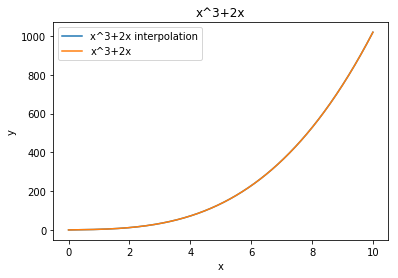

In [22]:
#Podsumowanie
import inspect

def newton_summary(fx, nodes_number, function):
    print("Number of nodes:", nodes_number)
    original_points = lookupTab(fx, nodes_number)
    middle_points = lookupTab2(fx, nodes_number) 
    print("Stablicowanie funkcji {function} w punktach węzłowych\n")
    printLookupTab(fx, nodes_number, function)
    print("\nStablicowanie funkcji {function} w punktach pośrednich\n")
    printLookupTab2(fx, nodes_number,function)
    interpolated = newton_polynomial(original_points)
    print("\nWielomian interpolacyjny Newtona:",interpolated,"\n")
    interpolation_values = calculate_values(interpolated, middle_points)
    compare_results(middle_points, interpolation_values, function)
    show_charts_main_nodes(fx, interpolated, function)
    
def show_summary():
    nodes_number=[3,4,5,8]
    function=["sqrt(x)", "sin(x)", "x^3+2x"]
    fx=[lambda x: np.sqrt(x), lambda x: np.sin(x),lambda x: x**3+2*x]
    
    for f in range(len(fx)):
        print(function[f])
        for n in nodes_number:
            newton_summary(fx[f], n, function[f])
        print("\n")

show_summary()  

#### Zadanie 2: Interpolacj metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 



In [10]:
def hermite_polynomial(zipList):
    x, y = list(zip(*zipList))
    result= []
    
    for val in range(len(y)):
        result.append(y[val])
    
    n = len(x)
    multiplicity = n*[0]

    for i in range(1, n):
        if x[i] == x[i - 1]:
            multiplicity[i] = multiplicity[i - 1] + 1
        else:
            multiplicity[i] = 0

    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            if multiplicity[j] == 0:
                result[j] = (result[j] - result[j - 1 - multiplicity[j - 1]]) / (x[j] - x[j - i])
            else:
                result[j] /= i
                multiplicity[j] -= 1

    X = sympy.symbols('x')
    polynomial = 0
    for i in range(n):
        value = result[i]
        for j in range(i):
            value *= (X - x[j])
        polynomial += value

    return sympy.simplify(polynomial)

sqrt(x)
Number of nodes: 3

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 5.0000000000  2.2360679775
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
2.5000000000  1.5811388301
7.5000000000  2.7386127875

Wielomian interpolacyjny Hermite'a: x*(0.578199424983078 - 0.026197165896624*x) 


           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
2.5000000000  1.5811388301             1.2817662756      0.1893398282      0.2993725545
7.5000000000  2.7386127875             2.8629051057      0.0453851376      0.1242923182 




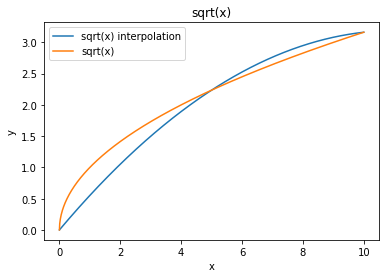

Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
1.6666666667  1.2909944487
5.0000000000  2.2360679775
8.3333333333  2.8867513459

Wielomian interpolacyjny Hermite'a: x*(0.00402091444262343*x**2 - 0.0883364112915616*x + 0.797500434670111) 


           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.6666666667  1.2909944487             1.1024038155      0.1460816764      0.1885906332
5.0000000000  2.2360679775             2.2817061964      0.0204100320      0.0456382189
8.3333333333  2.8867513459             2.8382820294      0.0167902638      0.0484693165 




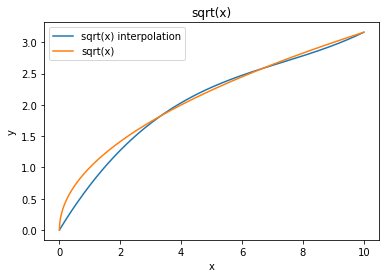

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.5000000000  1.5811388301
 5.0000000000  2.2360679775
 7.5000000000  2.7386127875
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
1.2500000000  1.1180339887
3.7500000000  1.9364916731
6.2500000000  2.5000000000
8.7500000000  2.9580398915

Wielomian interpolacyjny Hermite'a: x*(-0.00074700900829116*x**3 + 0.0194592721406771*x**2 - 0.187359671555827*x + 0.990906275798561) 


           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.2500000000  1.1180339887             0.9820659964      0.1216134695      0.1359679924
3.7500000000  1.9364916731             1.9596017579      0.0119339965      0.0231100848
6.2500000000  2.5000

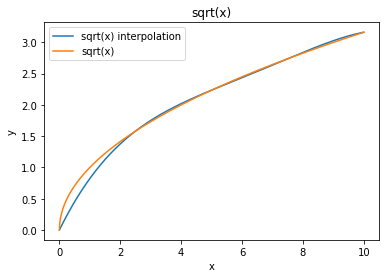

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.4285714286  1.1952286093
 2.8571428571  1.6903085095
 4.2857142857  2.0701966780
 5.7142857143  2.3904572187
 7.1428571429  2.6726124191
 8.5714285714  2.9277002188
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
0.7142857143  0.8451542547
2.1428571429  1.4638501094
3.5714285714  1.8898223650
5.0000000000  2.2360679775
6.4285714286  2.5354627642
7.8571428571  2.8030595529
9.2857142857  3.0472470011

Wielomian interpolacyjny Hermite'a: x*(7.42233773029374e-6*x**6 - 0.00029976185987522*x**5 + 0.00499658093915404*x**4 - 0.0444853479059*x**3 + 0.229165167590857*x**2 - 0.700756370176983*x + 1.4806614802889) 


           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  ------------------

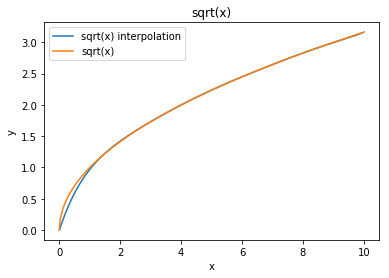



sin(x)
Number of nodes: 3

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 5.0000000000  -0.9589242747
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x        sin(x)
------------  ------------
2.5000000000  0.5984721441
7.5000000000  0.9379999768

Wielomian interpolacyjny Hermite'a: x*(0.0274765487687381*x - 0.329167598776318) 


           x        sin(x)    sin(x) interpolation    relative error    absolute error
------------  ------------  ----------------------  ----------------  ----------------
2.5000000000  0.5984721441           -0.6511905671      2.0880883489      1.2496627112
7.5000000000  0.9379999768           -0.9232011226      1.9842229696      1.8612010994 




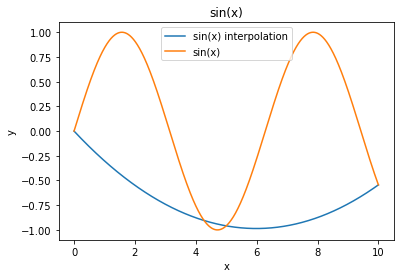

Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
1.6666666667   0.9954079578
5.0000000000  -0.9589242747
8.3333333333   0.8872941081

Wielomian interpolacyjny Hermite'a: x*(-0.0100718041105327*x**2 + 0.134705963139825*x - 0.394281331433923) 


           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.6666666667   0.9954079578           -0.3295810442      1.3311014761      1.3249890019
5.0000000000  -0.9589242747            0.1372669075     -1.1431467647      1.0961911822
8.3333333333   0.8872941081            0.2403126699      0.7291623288      0.6469814382 




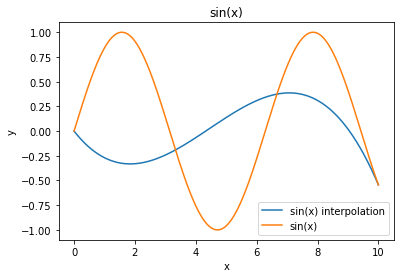

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.5000000000   0.5984721441
 5.0000000000  -0.9589242747
 7.5000000000   0.9379999768
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
1.2500000000   0.9489846194
3.7500000000  -0.5715613187
6.2500000000  -0.0331792165
8.7500000000   0.6247239538

Wielomian interpolacyjny Hermite'a: x*(-0.0132730189252085*x**3 + 0.258937302364272*x**2 - 1.53380467478385*x + 2.66293332553089) 


           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.2500000000   0.9489846194            1.4054289399      0.4809817896      0.4564443205
3.7500000000  -0.5715613187           -0.5530228042     -0.0324348655      0.0185385145
6.250000000

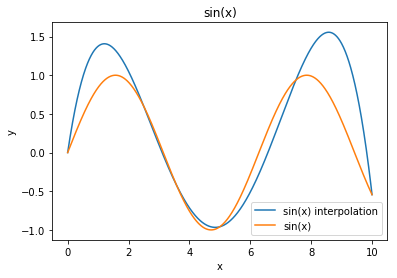

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.4285714286   0.9899030764
 2.8571428571   0.2806293995
 4.2857142857  -0.9103469443
 5.7142857143  -0.5387052884
 7.1428571429   0.7576284154
 8.5714285714   0.7534867274
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
0.7142857143   0.6550778972
2.1428571429   0.8407871058
3.5714285714  -0.4167216518
5.0000000000  -0.9589242747
6.4285714286   0.1448744883
7.8571428571   0.9999950033
9.2857142857   0.1386158897

Wielomian interpolacyjny Hermite'a: x*(-3.07126847293397e-5*x**6 + 0.00167369660358144*x**5 - 0.032004651889518*x**4 + 0.274799719893534*x**3 - 1.05359642423719*x**2 + 1.3684416915428*x + 0.210646770043321) 


           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------

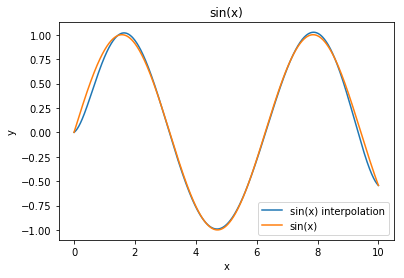



x^3+2x
Number of nodes: 3

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 5.0000000000   135.0000000000
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
2.5000000000   20.6250000000
7.5000000000  436.8750000000

Wielomian interpolacyjny Hermite'a: x*(15.0*x - 48.0) 


           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
2.5000000000   20.6250000000          -26.2500000000      2.2727272727     46.8750000000
7.5000000000  436.8750000000          483.7500000000      0.1072961373     46.8750000000 




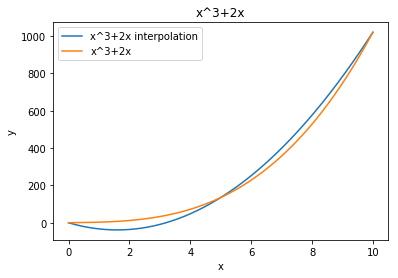

Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
1.6666666667    7.9629629630
5.0000000000  135.0000000000
8.3333333333  595.3703703704

Wielomian interpolacyjny Hermite'a: x*(1.0*x**2 + 2.0) 


           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.6666666667    7.9629629630            7.9629629630      0.0000000000      0.0000000000
5.0000000000  135.0000000000          135.0000000000      0.0000000000      0.0000000000
8.3333333333  595.3703703704          595.3703703704      0.0000000000      0.0000000000 




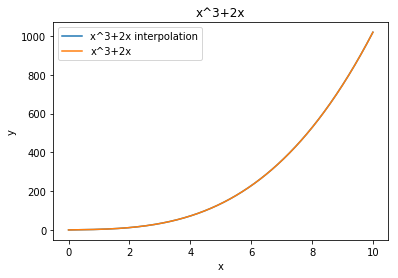

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 2.5000000000    20.6250000000
 5.0000000000   135.0000000000
 7.5000000000   436.8750000000
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
1.2500000000    4.4531250000
3.7500000000   60.2343750000
6.2500000000  256.6406250000
8.7500000000  687.4218750000

Wielomian interpolacyjny Hermite'a: x*(1.0*x**2 + 2.0) 


           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.2500000000    4.4531250000            4.4531250000      0.0000000000      0.0000000000
3.7500000000   60.2343750000           60.2343750000      0.0000000000      0.0000000000
6.2500000000  256.6406250000          256.6406250000      0.00

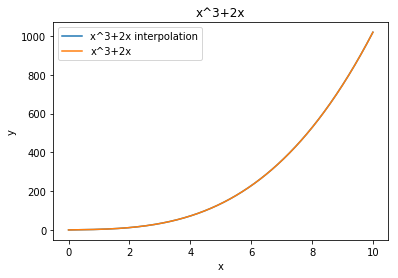

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 1.4285714286     5.7725947522
 2.8571428571    29.0379008746
 4.2857142857    87.2886297376
 5.7142857143   198.0174927114
 7.1428571429   378.7172011662
 8.5714285714   646.8804664723
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
0.7142857143    1.7930029155
2.1428571429   14.1253644315
3.5714285714   52.6967930029
5.0000000000  135.0000000000
6.4285714286  278.5276967930
7.8571428571  500.7725947522
9.2857142857  819.2274052478

Wielomian interpolacyjny Hermite'a: x*(2.79258098127381e-18*x**6 - 1.01231060571176e-16*x**5 + 1.43663784572349e-15*x**4 - 1.01386491794623e-14*x**3 + 1.00000000000004*x**2 - 6.4881962236724e-14*x + 2.00000000000004) 


           x          x^3+2x    x^3+2x interpolation    relative error    ab

In [ ]:
def hermite_summary(fx, nodes_number, function):
    print("Number of nodes:", nodes_number)
    original_points=lookupTab(fx, nodes_number)
    middle_points=lookupTab2(fx, nodes_number)
    print("\nStablicowanie funkcji {function} w punktach węzłowych\n")
    printLookupTab(fx, nodes_number, function)
    print("\nStablicowanie funkcji {function} w punktach pośrednich\n")
    printLookupTab2(fx, nodes_number,function)
    interpolated=hermite_polynomial(original_points)
    print("\nWielomian interpolacyjny Hermite'a:",interpolated,"\n\n")
    interpolation_values=calculate_values(interpolated, middle_points)
    compare_results(middle_points, interpolation_values, function)
    show_charts_main_nodes(fx, interpolated, function)
    
def show_summary_hermite():
    nodes_number=[3,4,5,8] 
    function=["sqrt(x)", "sin(x)", "x^3+2x"]
    fx=[lambda x: np.sqrt(x), lambda x: np.sin(x),lambda x: x**3+2*x]
    
    for f in range(len(fx)):
        print(function[f])
        for n in nodes_number:
            hermite_summary(fx[f], n, function[f])
        print("\n")

show_summary_hermite()

#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego 

Number of nodes: 40

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 0.2564102564  0.5063696835
 0.5128205128  0.7161148740
 0.7692307692  0.8770580193
 1.0256410256  1.0127393671
 1.2820512821  1.1322770341
 1.5384615385  1.2403473459
 1.7948717949  1.3397282541
 2.0512820513  1.4322297481
 2.3076923077  1.5191090506
 2.5641025641  1.6012815381
 2.8205128205  1.6794382455
 3.0769230769  1.7541160386
 3.3333333333  1.8257418584
 3.5897435897  1.8946618669
 3.8461538462  1.9611613514
 4.1025641026  2.0254787342
 4.3589743590  2.0878156909
 4.6153846154  2.1483446221
 4.8717948718  2.2072142786
 5.1282051282  2.2645540683
 5.3846153846  2.3204774045
 5.6410256410  2.3750843440
 5.8974358974  2.4284636908
 6.1538461538  2.4806946918
 6.4102564103  2.5318484177
 6.6666666667  2.5819888975
 6.9230769231  2.6311740579
 7.1794871795  2.6794565082
 7.4358974359  2.7268841992
 7.6923076923  2.7735009811


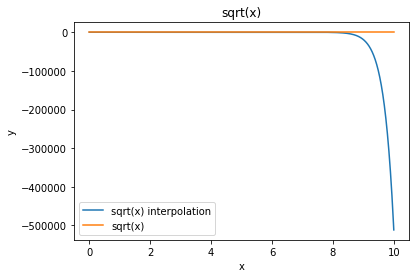

Number of nodes: 40

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 0.2564102564   0.2536098107
 0.5128205128   0.4906368889
 0.7692307692   0.6955827937
 1.0256410256   0.8550467695
 1.2820512821   0.9586019781
 1.5384615385   0.9994772763
 1.7948717949   0.9749999594
 2.0512820513   0.8867705207
 2.3076923077   0.7405580004
 2.5641025641   0.5459227664
 2.8205128205   0.3155913928
 3.0769230769   0.0646245097
 3.3333333333  -0.1905679629
 3.5897435897  -0.4332998073
 3.8461538462  -0.6476995663
 4.1025641026  -0.8197483271
 4.3589743590  -0.9381963726
 4.6153846154  -0.9952987648
 4.8717948718  -0.9873217615
 5.1282051282  -0.9147869532
 5.3846153846  -0.7824371585
 5.6410256410  -0.5989263064
 5.8974358974  -0.3762535830
 6.1538461538  -0.1289788440
 6.4102564103   0.1267294082
 6.6666666667   0.3741512306
 6.9230769231   0.5971085034
 7.1794871795   0.7810227654
 7.4358974359   0.9138684

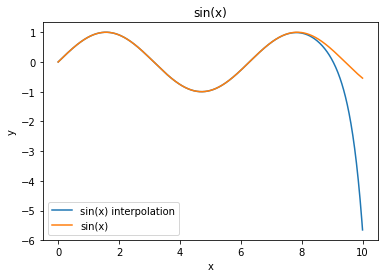

Number of nodes: 40

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 0.2564102564     0.5296785178
 0.5128205128     1.1605050658
 0.7692307692     1.9936276741
 1.0256410256     3.1301943728
 1.2820512821     4.6713531921
 1.5384615385     6.7182521620
 1.7948717949     9.3720393129
 2.0512820513    12.7338626747
 2.3076923077    16.9048702777
 2.5641025641    21.9862101519
 2.8205128205    28.0790303276
 3.0769230769    35.2844788348
 3.3333333333    43.7037037037
 3.5897435897    53.4378529645
 3.8461538462    64.5880746472
 4.1025641026    77.2555167821
 4.3589743590    91.5413273993
 4.6153846154   107.5466545289
 4.8717948718   125.3726462010
 5.1282051282   145.1204504459
 5.3846153846   166.8912152936
 5.6410256410   190.7860887743
 5.8974358974   216.9062189181
 6.1538461538   245.3527537551
 6.4102564103   276.2268413156
 6.6666666667   309.6296296296
 6.9230769231   345.66226

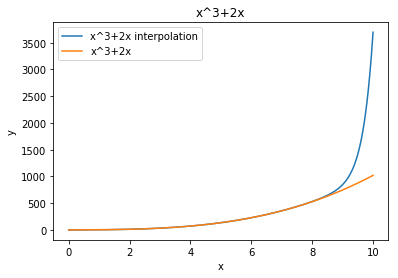

In [16]:
def show_effect():
    nodes_number=40
    function=["sqrt(x)", "sin(x)", "x^3+2x"]
    fx=[lambda x: np.sqrt(x), lambda x: np.sin(x),lambda x: x**3+2*x]
    
    for f in range(len(fx)):
        hermite_summary(fx[f], nodes_number, function[f])
    print("\n")

show_effect()

### Wyjaśnienie:

Amplituda “oscylacji” wielomianu interpolacyjnego w pobliżu konców przedziału powiększa się wraz ze wzrostem jego stopnia n.Efekt Rungego pojawia się ze względu na stosowanie równomiernie rozłożonych węzłow. 
Lekarstwem na efekt Rungego (do pewnego stopnia) jest użycie węzłów rozmieszczonych nierównomiernie, znacznie gęściej w pobliżu końców przedziału interpolacji.



#### Zadanie 4: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 

sqrt(x)
Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 3.3333333333  1.8257418584
 6.6666666667  2.5819888975
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
1.6666666667  1.2909944487
5.0000000000  2.2360679775
8.3333333333  2.8867513459
           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.6666666667  1.2909944487             1.1024038155      0.1460816764      0.1885906332
5.0000000000  2.2360679775             2.2817061964      0.0204100320      0.0456382189
8.3333333333  2.8867513459             2.8382820294      0.0167902638      0.0484693165 




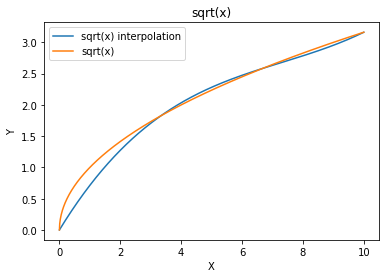

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 2.5000000000  1.5811388301
 5.0000000000  2.2360679775
 7.5000000000  2.7386127875
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
1.2500000000  1.1180339887
3.7500000000  1.9364916731
6.2500000000  2.5000000000
8.7500000000  2.9580398915
           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
1.2500000000  1.1180339887             0.9656522242      0.1362943936      0.1523817645
3.7500000000  1.9364916731             1.9650730153      0.0147593416      0.0285813422
6.2500000000  2.5000000000             2.4908518849      0.0036592460      0.0091481151
8.7500000000  2.9580398915             2.9666537058      0.0029120007 

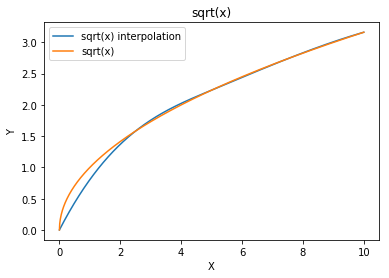

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x       sqrt(x)
-------------  ------------
 0.0000000000  0.0000000000
 1.4285714286  1.1952286093
 2.8571428571  1.6903085095
 4.2857142857  2.0701966780
 5.7142857143  2.3904572187
 7.1428571429  2.6726124191
 8.5714285714  2.9277002188
10.0000000000  3.1622776602

Stablicowanie funkcji {function} w punktach pośrednich

           x       sqrt(x)
------------  ------------
0.7142857143  0.8451542547
2.1428571429  1.4638501094
3.5714285714  1.8898223650
5.0000000000  2.2360679775
6.4285714286  2.5354627642
7.8571428571  2.8030595529
9.2857142857  3.0472470011
           x       sqrt(x)    sqrt(x) interpolation    relative error    absolute error
------------  ------------  -----------------------  ----------------  ----------------
0.7142857143  0.8451542547             0.7304166369      0.1357593802      0.1147376178
2.1428571429  1.4638501094             1.4850034045      0.0144504515      0.0211

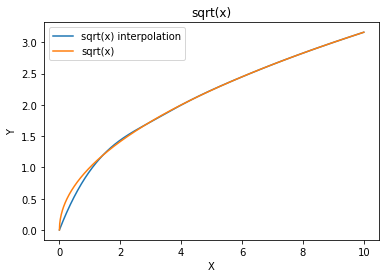



sin(x)
Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 3.3333333333  -0.1905679629
 6.6666666667   0.3741512306
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
1.6666666667   0.9954079578
5.0000000000  -0.9589242747
8.3333333333   0.8872941081
           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.6666666667   0.9954079578           -0.3295810442      1.3311014761      1.3249890019
5.0000000000  -0.9589242747            0.1372669075     -1.1431467647      1.0961911822
8.3333333333   0.8872941081            0.2403126699      0.7291623288      0.6469814382 




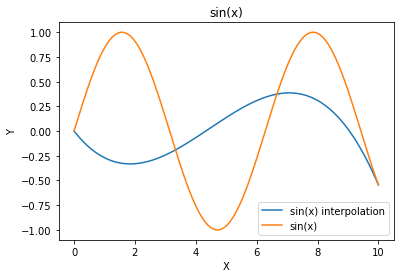

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 2.5000000000   0.5984721441
 5.0000000000  -0.9589242747
 7.5000000000   0.9379999768
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
1.2500000000   0.9489846194
3.7500000000  -0.5715613187
6.2500000000  -0.0331792165
8.7500000000   0.6247239538
           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
1.2500000000   0.9489846194            1.1137854576      0.1736601784      0.1648008383
3.7500000000  -0.5715613187           -0.4558083102     -0.2025207179      0.1157530086
6.2500000000  -0.0331792165           -0.2096020953     -5.3172707831      0.1764228788
8.7500000000   0.6247239538            1.2408657141      

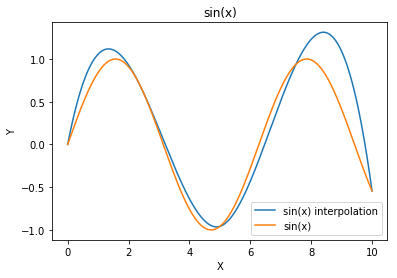

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x         sin(x)
-------------  -------------
 0.0000000000   0.0000000000
 1.4285714286   0.9899030764
 2.8571428571   0.2806293995
 4.2857142857  -0.9103469443
 5.7142857143  -0.5387052884
 7.1428571429   0.7576284154
 8.5714285714   0.7534867274
10.0000000000  -0.5440211109

Stablicowanie funkcji {function} w punktach pośrednich

           x         sin(x)
------------  -------------
0.7142857143   0.6550778972
2.1428571429   0.8407871058
3.5714285714  -0.4167216518
5.0000000000  -0.9589242747
6.4285714286   0.1448744883
7.8571428571   0.9999950033
9.2857142857   0.1386158897
           x         sin(x)    sin(x) interpolation    relative error    absolute error
------------  -------------  ----------------------  ----------------  ----------------
0.7142857143   0.6550778972            0.7601286021      0.1603636840      0.1050507049
2.1428571429   0.8407871058            0.7948833623      0.054

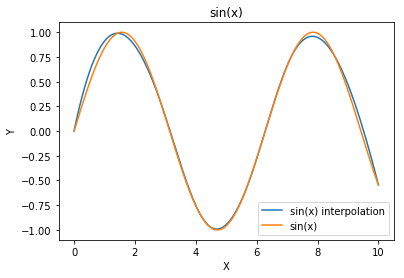



x^3+2x
Number of nodes: 4

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 3.3333333333    43.7037037037
 6.6666666667   309.6296296296
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
1.6666666667    7.9629629630
5.0000000000  135.0000000000
8.3333333333  595.3703703704
           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.6666666667    7.9629629630            7.9629629630      0.0000000000      0.0000000000
5.0000000000  135.0000000000          135.0000000000      0.0000000000      0.0000000000
8.3333333333  595.3703703704          595.3703703704      0.0000000000      0.0000000000 




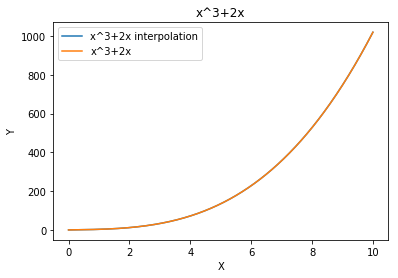

Number of nodes: 5

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 2.5000000000    20.6250000000
 5.0000000000   135.0000000000
 7.5000000000   436.8750000000
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
1.2500000000    4.4531250000
3.7500000000   60.2343750000
6.2500000000  256.6406250000
8.7500000000  687.4218750000
           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
1.2500000000    4.4531250000            4.4531250000      0.0000000000      0.0000000000
3.7500000000   60.2343750000           60.2343750000      0.0000000000      0.0000000000
6.2500000000  256.6406250000          256.6406250000      0.0000000000      0.0000000000
8.7500000000  687.4218750000    

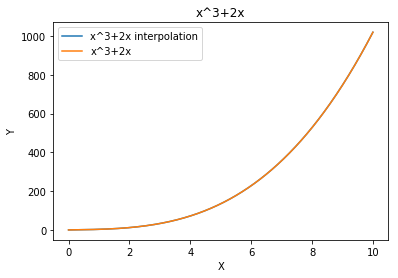

Number of nodes: 8

Stablicowanie funkcji {function} w punktach węzłowych

            x           x^3+2x
-------------  ---------------
 0.0000000000     0.0000000000
 1.4285714286     5.7725947522
 2.8571428571    29.0379008746
 4.2857142857    87.2886297376
 5.7142857143   198.0174927114
 7.1428571429   378.7172011662
 8.5714285714   646.8804664723
10.0000000000  1020.0000000000

Stablicowanie funkcji {function} w punktach pośrednich

           x          x^3+2x
------------  --------------
0.7142857143    1.7930029155
2.1428571429   14.1253644315
3.5714285714   52.6967930029
5.0000000000  135.0000000000
6.4285714286  278.5276967930
7.8571428571  500.7725947522
9.2857142857  819.2274052478
           x          x^3+2x    x^3+2x interpolation    relative error    absolute error
------------  --------------  ----------------------  ----------------  ----------------
0.7142857143    1.7930029155            1.7930029155      0.0000000000      0.0000000000
2.1428571429   14.1253644315  

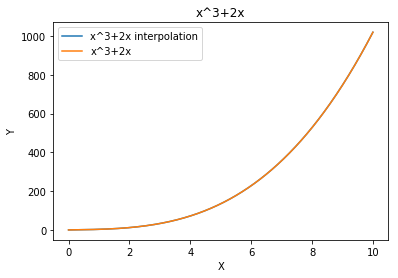

In [27]:
import scipy.interpolate
def bspline(zipList):
    x = list(zip(*zipList))[0]
    y = list(zip(*zipList))[1]
    t, c, k = scipy.interpolate.splrep(x, y)
    return scipy.interpolate.BSpline(t, c, k)

def count_values(f, zipList):
    domain=list(zip(*zipList))[0]
    values = []
    for number in domain:
        values.append(f(number))
    return values

def charts(function, polynomial, function_name):
    zipList= lookupTab(function, 1000)
    domain = list(zip(*zipList))[0]
    values = list(zip(*zipList))[1]
    values_in = count_values(polynomial, zipList)
    plt.plot(domain, values_in, label=function_name + " interpolation")
    plt.plot(domain, values, label=function_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(function_name)
    plt.legend()
    plt.show()
    
def scipy_summary(fx, nodes_number, function):
    print("Number of nodes:", nodes_number)
    original_points=lookupTab(fx, nodes_number)
    middle_points=lookupTab2(fx, nodes_number)
    print("\nStablicowanie funkcji {function} w punktach węzłowych\n")
    printLookupTab(fx, nodes_number, function)
    print("\nStablicowanie funkcji {function} w punktach pośrednich\n")
    printLookupTab2(fx, nodes_number,function)
    interpolated=bspline(original_points)
    interpolation_results=count_values(interpolated, middle_points)
    compare_results(middle_points, interpolation_results, function)
    charts(fx, interpolated, function)

def show_summary_scipy():
    nodes_number=[4,5,8]
    function=["sqrt(x)", "sin(x)", "x^3+2x"]
    fx=[lambda x: np.sqrt(x), lambda x: np.sin(x),lambda x: x**3+2*x]  
    for f in range(len(fx)):
        print(function[f])
        for n in nodes_number:
            scipy_summary(fx[f], n, function[f])
        print("\n")

show_summary_scipy()
